# Sentiment Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nltk import sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from afinn import Afinn

In [2]:
paragraph = """This is a fun fun amazing a test. 
We can't not take it seriously. 
It was one of the worst movies I've seen, despite good reviews. 
Unbelievably bad acting!! 
Poor direction. 
VERY poor production. 
The movie was bad. 
Very bad movie. 
VERY bad movie. 
VERY BAD movie. 
VERY BAD movie!
I didn't like this movie. 
I like to hate Michael Bay films, but I couldn't fault this one.
This movie doesn't care about cleverness, wit or any other kind of intelligent humor.
Most automated sentiment analysis tools are shit.
Our sentiment analysis is the shit."""

In [3]:
lines_list = tokenize.sent_tokenize(paragraph)

## Liu and Hu Lexicon

In [4]:
sentiment.util.demo_liu_hu_lexicon("this is fun fun amazing a test")

Positive


Positive


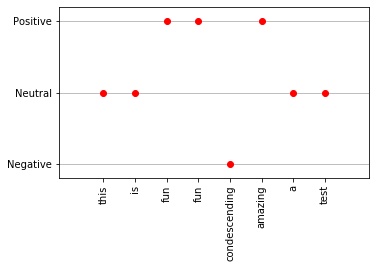

In [6]:
sentiment.util.demo_liu_hu_lexicon("this is fun fun condescending amazing a test", plot=True)

In [7]:
for line in lines_list:
    sentiment.util.demo_liu_hu_lexicon(line)
    print(line)

Positive
This is a fun fun amazing a test.
Neutral
We can't not take it seriously.
Neutral
It was one of the worst movies I've seen, despite good reviews.
Negative
Unbelievably bad acting!!
Negative
Poor direction.
Negative
VERY poor production.
Negative
The movie was bad.
Negative
Very bad movie.
Negative
VERY bad movie.
Negative
VERY BAD movie.
Negative
VERY BAD movie!
Positive
I didn't like this movie.
Negative
I like to hate Michael Bay films, but I couldn't fault this one.
Positive
This movie doesn't care about cleverness, wit or any other kind of intelligent humor.
Negative
Most automated sentiment analysis tools are shit.
Negative
Our sentiment analysis is the shit.


## AFINN

In [8]:
afinn = Afinn()
afinn.score('This is utterly excellent!')

3.0

In [9]:
for line in lines_list:
    print(afinn.score(line), line)

12.0 This is a fun fun amazing a test.
0.0 We can't not take it seriously.
0.0 It was one of the worst movies I've seen, despite good reviews.
-3.0 Unbelievably bad acting!!
-2.0 Poor direction.
-2.0 VERY poor production.
-3.0 The movie was bad.
-3.0 Very bad movie.
-3.0 VERY bad movie.
-3.0 VERY BAD movie.
-3.0 VERY BAD movie!
2.0 I didn't like this movie.
-1.0 I like to hate Michael Bay films, but I couldn't fault this one.
6.0 This movie doesn't care about cleverness, wit or any other kind of intelligent humor.
-4.0 Most automated sentiment analysis tools are shit.
-4.0 Our sentiment analysis is the shit.


## VADER

In [10]:
sid = SentimentIntensityAnalyzer()
for sentence in lines_list:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         print(f'{k}: {ss[k]}, ', end='')
     print()

This is a fun fun amazing a test.
compound: 0.886, neg: 0.0, neu: 0.224, pos: 0.776, 
We can't not take it seriously.
compound: 0.1326, neg: 0.0, neu: 0.767, pos: 0.233, 
It was one of the worst movies I've seen, despite good reviews.
compound: -0.7584, neg: 0.394, neu: 0.606, pos: 0.0, 
Unbelievably bad acting!!
compound: -0.6572, neg: 0.686, neu: 0.314, pos: 0.0, 
Poor direction.
compound: -0.4767, neg: 0.756, neu: 0.244, pos: 0.0, 
VERY poor production.
compound: -0.6281, neg: 0.674, neu: 0.326, pos: 0.0, 
The movie was bad.
compound: -0.5423, neg: 0.538, neu: 0.462, pos: 0.0, 
Very bad movie.
compound: -0.5849, neg: 0.655, neu: 0.345, pos: 0.0, 
VERY bad movie.
compound: -0.6732, neg: 0.694, neu: 0.306, pos: 0.0, 
VERY BAD movie.
compound: -0.7398, neg: 0.724, neu: 0.276, pos: 0.0, 
VERY BAD movie!
compound: -0.7616, neg: 0.735, neu: 0.265, pos: 0.0, 
I didn't like this movie.
compound: -0.2755, neg: 0.413, neu: 0.587, pos: 0.0, 
I like to hate Michael Bay films, but I couldn't fau

## Visualizing Sentiment Over Time

In [11]:
fopen = open("Corpus2020/Books/Eye_Of_The_World.txt")
lines_list = tokenize.sent_tokenize(fopen.read())

In [12]:
sent_afinn = []
for line in lines_list:
    sent_afinn.append(afinn.score(line))
len(sent_afinn)

27209

-0.06960932044544085

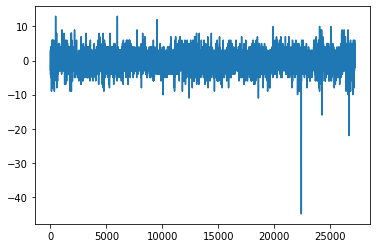

In [13]:
plt.plot(range(len(sent_afinn)), sent_afinn)
sum(sent_afinn) / len(sent_afinn)

In [14]:
for i in range(len(sent_afinn)):
    if sent_afinn[i] < -10 or sent_afinn[i] > 10:
        print(i, sent_afinn[i], lines_list[i])

467 13.0 There would be contests at solving riddles and puzzles, at the rope tug, and lifting and tossing weights, prizes for the best singer, the best dancer and the best fiddle player, for the quickest to shear a sheep, even the best at bowls, and at darts.
5982 13.0 "Mara and the Three Foolish Kings," or one of the hundreds about Anla the Wise Counselor, or something filled with glory and adventure, like The Great Hunt of the Horn, but always with a happy ending and a joyous homecoming.
9543 12.0 "I may not like her, it is true," Nynaeve was saying to the Warder as Rand, leading Bela and Cloud, came in behind Thom, "but I help anyone who needs my help, whether I like them or not."
12402 -11.0 Perrin was sure she was hunting for the rest of the pack, though she denied it angrily when he suggested as much, denied being afraid of the wolves that paced them, denied worrying about the rest of the pack or what it was up to.
18591 -11.0 They appeared where they were least expected, these m

In [15]:
def moving_average(data, window):
    t = []
    for i in range(len(data) - window):
        t.append(sum(data[i:i+window]) / window)
    return t

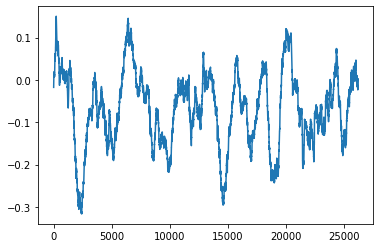

In [16]:
n = moving_average(sent_afinn, 2**10)
plt.plot(range(len(n)), n)

In [17]:
sent = []
for line in lines_list:
    sent.append(sid.polarity_scores(line)["compound"])
len(sent)

27209

In [21]:
sent[22427]

0.3612

In [19]:
for i in range(len(sent)):
    if float(sent[i]) < -0.9:
        print(sent[i], lines_list[i])

-0.9032 "For what else you have done, there can be no forgiveness, Betrayer, but for Ilyena's death I will destroy you beyond anything your master can repair.
-0.9274 There was only shadow to see in the hood, but he felt hatred as sharply as if he could see a snarling face, hatred for everything that lived.
-0.9428 Since he can wield the Power, none but Aes Sedai can defeat him, for all the battles they fight, or deal with him once he's defeated.
-0.9501 "In wars, boy, fools kill other fools for foolish causes.
-0.9509 I will tell of the Time of Madness, when Aes Sedai shattered the world; of the Trolloc Wars, when men battled Trollocs for rule of the earth; of the War of the Hundred Years, when men battled men and the nations of our day were wrought.
-0.9062 Even if it did kill the stench, they still knew the stench was there, and they still knew what they were doing.
-0.9022 In the distance reared a single mountain, its peak broken and split, but this mountain brought no fear or desp

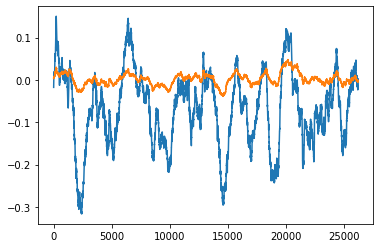

In [22]:
n = moving_average(sent_afinn, 2**10)
plt.plot(range(len(n)), n)
n = moving_average(sent, 2**10)
plt.plot(range(len(n)), n)